# Regression
## Régression linéaire

In [1]:
import pandas as pd

In [2]:
data = pd.DataFrame({
    "taille": [10, 13, 20, 21, 40, 45, 100, 160, 180],
    "age": [0.2, 0.5, 1, 1.5, 1, 2, 7, 15, 19],
})

<AxesSubplot:xlabel='taille', ylabel='age'>

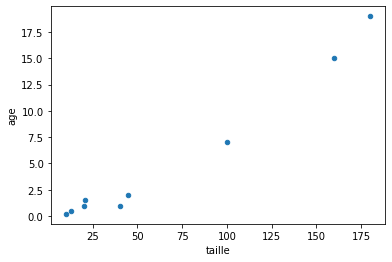

In [4]:
data.plot(kind="scatter", x="taille", y="age")

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
regr = LinearRegression()

In [15]:
regr.fit(data[["taille"]], data["age"])

LinearRegression()

In [16]:
regr.intercept_

-1.6870592211742812

In [17]:
regr.coef_

array([0.10591432])

In [ ]:
# f(x) = 0.105 * x - 1.687

In [19]:
regr.predict([[180]])

/Users/blef/.virtualenvs/lab/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.37751792])

<AxesSubplot:xlabel='taille', ylabel='age'>

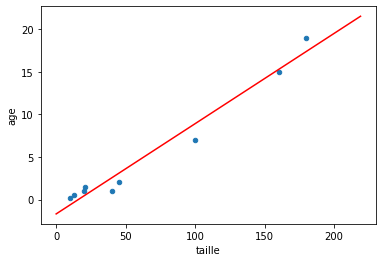

In [23]:
predictions = regr.predict([[taille] for taille in range(220)])

ax = data.plot(kind="scatter", x="taille", y="age")
pd.Series(predictions).plot(ax=ax, color="red")

## Régression polynomiale

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly = PolynomialFeatures(degree=5)

In [49]:
X = poly.fit_transform(data[["taille"]])

In [50]:
regr.fit(X, data["age"])

LinearRegression()

<AxesSubplot:xlabel='taille', ylabel='age'>

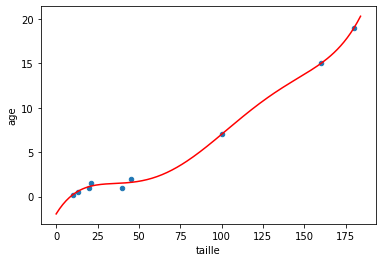

In [51]:
predictions = regr.predict(
    poly.fit_transform([[taille] for taille in range(185)])
)

ax = data.plot(kind="scatter", x="taille", y="age")
pd.Series(predictions).plot(ax=ax, color="red")

# Classification
## Régression logistique

In [61]:
prenoms = pd.read_csv("prenoms.csv", sep=";").dropna()

### On cherche à prédire le genre d'une personne à partir de son prénom

In [63]:
# features
# - longueur du prénom
# - est-ce a ou o dans le prénom ?
prenoms.head()

,prenom,genre,nb
0,Michel,M,14136
1,Alain,M,10646
2,Philippe,M,9903
3,Bernard,M,8992
4,Christian,M,8102


In [64]:
prenoms["len_prenom"] = prenoms["prenom"].str.len()

In [67]:
prenoms["a_o"] = (prenoms["prenom"].str.lower()
    .apply(lambda x: "a" in x or "o" in x)
)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
regr_log = LogisticRegression()

In [71]:
X = prenoms[["len_prenom", "a_o"]]
y = prenoms["genre"]

regr_log.fit(X, y)

LogisticRegression()

In [76]:
def encode_name(name):
    return [len(name), "a" in name.lower() or "o" in name.lower()]

In [218]:
# Christophe -> 10 et o
regr_log.predict([encode_name("Lea")])

/Users/blef/.virtualenvs/lab/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['F'], dtype=object)

In [219]:
regr_log.coef_

array([[ 0.0222779, -0.1782018]])

### Train test demo

In [223]:
A = prenoms[["len_prenom", "a_o", "genre"]]

In [225]:
from sklearn.model_selection import train_test_split

In [227]:
A_train, A_test = train_test_split(A, train_size=0.7)

In [231]:
X_train, y_train = A_train[["len_prenom", "a_o"]], A_train["genre"]
X_test, y_test = A_test[["len_prenom", "a_o"]], A_test["genre"]

In [232]:
regr_log_2 = LogisticRegression()

In [233]:
regr_log_2.fit(X_train, y_train)

LogisticRegression()

In [237]:
pd.crosstab(y_test, regr_log_2.predict(X_test))

col_0,F,M
genre,,
F,75,1707
M,108,1850


In [235]:
regr_log_2.score(X_test, y_test)

0.5147058823529411

In [254]:
from sklearn.metrics import accuracy_score, recall_score

In [246]:
len(regr_log_2.predict(X_test))

3740

In [251]:
recall_score(y_test, regr_log_2.predict(X_test), average=None)

array([0.04208754, 0.94484168])

In [255]:
accuracy_score(y_test, regr_log_2.predict(X_test))

0.5147058823529411

# Clustering
## K-Means

# train-test validation

# Exercices
## Prédiction du genre d'un prénom
## Prédiction du profit/note d'un film